##Import dependencies

In [1]:
!pip install opendatasets
!pip install pandas
import tensorflow as tf
import opendatasets as od
import pandas as pd
import numpy as np
import cv2 as cv
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from PIL import Image

2023-06-16 11:30:04.291788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Download the ddataset from the Kaggle API
# od.download('https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols', force=True)

## Preprocess the Colors


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

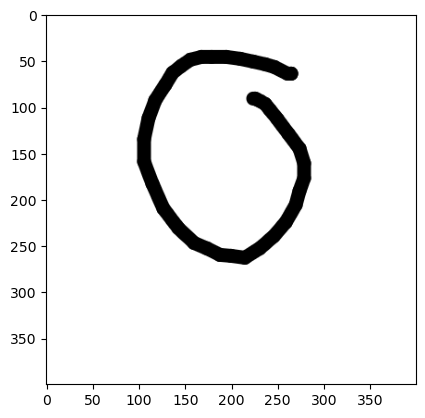

In [3]:
sample_img_path = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset', '0', '0CdBlhLw.png')
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [4]:
# Convert from CMYK to Gray scale
data_dir = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset')

for image_class in os.listdir(data_dir):
  if image_class.startswith('.'):
    continue
  for image in os.listdir(os.path.join(data_dir, image_class)):
    try:
      image_path = os.path.join(data_dir, image_class, image)
      image = cv.imread(image_path)
      grayImage = cv.cvtColor(image, cv.COLOR_RGBA2RGB)
      cv.imwrite(image_path, grayImage)
    except:
      continue

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

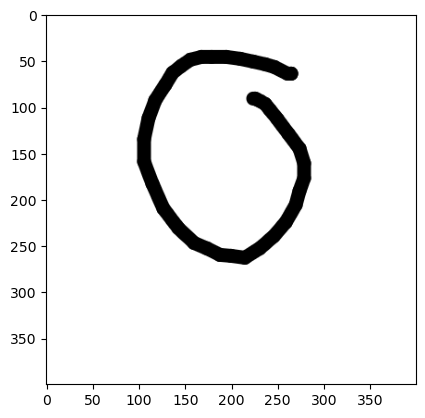

In [5]:
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [6]:
batch_size = 8
image_size = (32,32)
data_set = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size = batch_size, image_size = image_size)

Found 10071 files belonging to 19 classes.


In [7]:
print(repr(img))
print(img.shape)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Preprocess data set

In [8]:
from matplotlib.image import imread
imread(sample_img_path)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [9]:
# Normalize images
data_set = data_set.map(lambda x,y: (x/255, y))


In [10]:
input_shape=(32,32,3)

train_size = int(len(data_set)* .7)
val_size = int(len(data_set)*.2)+1
test_size = int(len(data_set)*.1)+1

In [11]:
train = data_set.take(train_size)
val = data_set.skip(train_size).take(val_size)
test = data_set.skip(train_size + val_size).take(test_size)

## Create Model using Resnet-50

In [12]:
data_directory = './handwritten-math-symbols/dataset'
img_height = 32
img_width = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 8057 files for training.


In [13]:

# for image in train_ds:
#   print(image)

# images, _ = next(train_ds)
# plt.imshow(images[0])

In [14]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 2014 files for validation.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

demo_resnet_model = Sequential()

pretrained_model_for_demo= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [16]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(19, activation='softmax'))

In [17]:
demo_resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 10
history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10


2023-06-16 11:30:35.884151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8057]
	 [[{{node Placeholder/_0}}]]
2023-06-16 11:30:35.884812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8057]
	 [[{{node Placeholder/_0}}]]


1007/1008 [============================>.] - ETA: 0s - loss: 0.9903 - accuracy: 0.6994

2023-06-16 11:31:30.194175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2014]
	 [[{{node Placeholder/_4}}]]
2023-06-16 11:31:30.194853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2014]
	 [[{{node Placeholder/_4}}]]


1008/1008 [==============================] - 68s 62ms/step - loss: 0.9902 - accuracy: 0.6994 - val_loss: 0.8771 - val_accuracy: 0.7150
Epoch 2/10
1008/1008 [==============================] - 86s 85ms/step - loss: 0.5460 - accuracy: 0.8163 - val_loss: 0.6091 - val_accuracy: 0.8009
Epoch 3/10
1008/1008 [==============================] - 182s 181ms/step - loss: 0.4451 - accuracy: 0.8553 - val_loss: 0.5856 - val_accuracy: 0.8193
Epoch 4/10
1008/1008 [==============================] - 130s 129ms/step - loss: 0.3901 - accuracy: 0.8712 - val_loss: 0.6128 - val_accuracy: 0.8148
Epoch 5/10
1008/1008 [==============================] - 139s 138ms/step - loss: 0.3207 - accuracy: 0.8907 - val_loss: 0.5109 - val_accuracy: 0.8456
Epoch 6/10
1008/1008 [==============================] - 131s 130ms/step - loss: 0.2924 - accuracy: 0.8992 - val_loss: 0.5297 - val_accuracy: 0.8396
Epoch 7/10
1008/1008 [==============================] - 130s 129ms/step - loss: 0.2508 - accuracy: 0.9110 - val_loss: 0.5186 - 

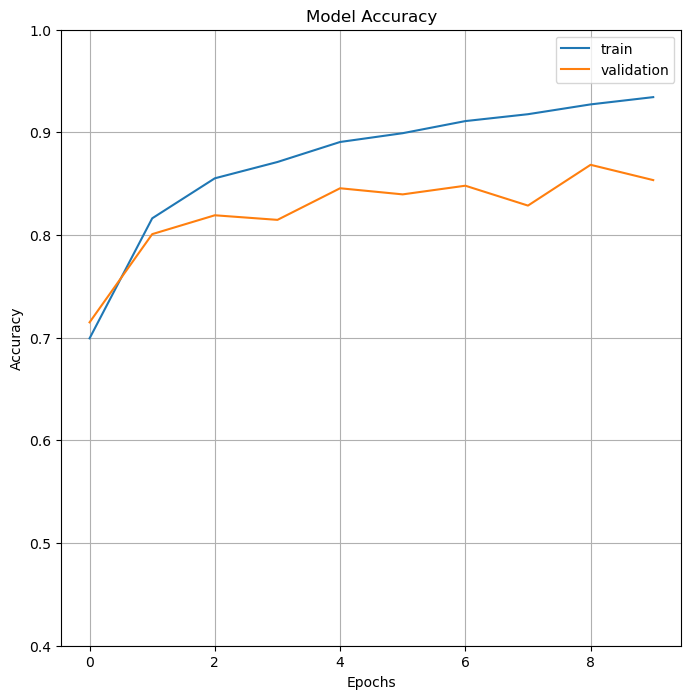

In [18]:
plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [19]:
#plotter_lib.show()

plt.savefig('output-plot.png')

<Figure size 640x480 with 0 Axes>

## Create Model using MobileNet

In [20]:
# from tensorflow.keras.applications import MobileNetV2

In [21]:
# mobilenet_input_shape = (32, 32, 3)
# mobilenet_model = tf.keras.applications.MobileNetV2(include_top=False,
#                                                     input_shape=(224, 224, 3),
#                                                     pooling='avg',classes=19,
#                                                     weights='imagenet')


## Create Model using VGG19

In [22]:
from tensorflow.keras.applications import VGG19

In [23]:
vgg19_model = Sequential()

vgg19_pretrained_model= tf.keras.applications.VGG19(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in vgg19_pretrained_model.layers:
        each_layer.trainable=False

vgg19_model.add(vgg19_pretrained_model)

In [24]:
vgg19_model.add(Flatten())

vgg19_model.add(Dense(512, activation='relu'))

vgg19_model.add(Dense(19, activation='softmax'))

In [25]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 8
try:
  history = vgg19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)
except Exception as e: print(e)

Epoch 1/8
1008/1008 [==============================] - 138s 135ms/step - loss: 2.3209 - accuracy: 0.7416 - val_loss: 1.0089 - val_accuracy: 0.7870
Epoch 2/8
1008/1008 [==============================] - 163s 162ms/step - loss: 0.5774 - accuracy: 0.8512 - val_loss: 0.7619 - val_accuracy: 0.8168
Epoch 3/8
1008/1008 [==============================] - 166s 164ms/step - loss: 0.3947 - accuracy: 0.8888 - val_loss: 0.5896 - val_accuracy: 0.8347
Epoch 4/8
1008/1008 [==============================] - 207s 206ms/step - loss: 0.3559 - accuracy: 0.8909 - val_loss: 0.6737 - val_accuracy: 0.8302
Epoch 5/8
1008/1008 [==============================] - 130s 129ms/step - loss: 0.3547 - accuracy: 0.8930 - val_loss: 0.6298 - val_accuracy: 0.8446
Epoch 6/8
1008/1008 [==============================] - 89s 88ms/step - loss: 0.3409 - accuracy: 0.9007 - val_loss: 0.5326 - val_accuracy: 0.8788
Epoch 7/8
1008/1008 [==============================] - 87s 86ms/step - loss: 0.3043 - accuracy: 0.9103 - val_loss: 0.461

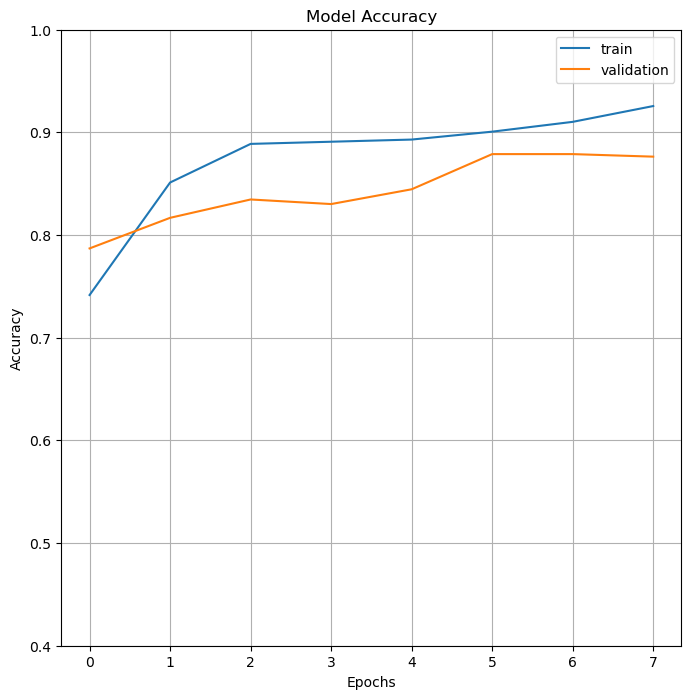

In [26]:
# Test

plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

## Create Model using Inception

In [27]:
from tensorflow.keras.applications import Inception_v3

ImportError: cannot import name 'Inception_v3' from 'tensorflow.keras.applications' (/Users/jpolina/anaconda3/envs/tf/lib/python3.11/site-packages/keras/api/_v2/keras/applications/__init__.py)

In [ ]:
# inception_model = Sequential()

# inception_pretrained_model= tf.keras.applications.Inception_v3(include_top=False,

#                    input_shape=input_shape,

#                    pooling='avg',classes=19,

#                    weights='imagenet')

# for each_layer in vgg19_pretrained_model.layers:
#         each_layer.trainable=False

# vgg19_model.add(vgg19_pretrained_model)

## Create Model using Tensorflow

In [ ]:
tf_model = models.Sequential()

# Convolutional base
tf_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
tf_model.add(layers.Flatten())
tf_model.add(layers.Dense(64, activation='relu'))
tf_model.add(layers.Dense(19))
tf_model.summary()

# The summary shows that the convolutional base has a (4, 4, 64) output, which
#   is flattened into a (1024) shaped vector, and then sent through two Dense
#   layers

tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf_history = tf_model.fit(train, epochs=10,
                    validation_data=val)

In [ ]:
plt.plot(tf_history.history['accuracy'], label='accuracy')
plt.plot(tf_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = tf_model.evaluate(test, verbose=2)